In [753]:
import pandas as pd

In [754]:
tenis_df = pd.read_csv("dane/Dane_ATP_2000-2024 d.csv", sep=';')

In [755]:
print(tenis_df.columns)

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')


In [756]:
print(tenis_df.shape[0], 'liczba rowow, powinno byc 73247')

73247 liczba rowow, powinno byc 73247


In [757]:
tenis_df.head(5)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2000-301,Auckland,Hard,32,A,20000110,1,103163,1.0,NaN,...,55.0,39.0,29.0,17.0,4.0,7.0,11.0,1612.0,63.0,595.0
1,2000-301,Auckland,Hard,32,A,20000110,2,102607,NaN,Q,...,32.0,25.0,18.0,12.0,3.0,6.0,211.0,157.0,49.0,723.0
2,2000-301,Auckland,Hard,32,A,20000110,3,103252,NaN,NaN,...,33.0,20.0,7.0,8.0,7.0,11.0,48.0,726.0,59.0,649.0
3,2000-301,Auckland,Hard,32,A,20000110,4,103507,7.0,NaN,...,43.0,29.0,14.0,10.0,6.0,8.0,45.0,768.0,61.0,616.0
4,2000-301,Auckland,Hard,32,A,20000110,5,102103,NaN,Q,...,46.0,34.0,18.0,12.0,5.0,9.0,167.0,219.0,34.0,873.0


<Axes: ylabel='count'>

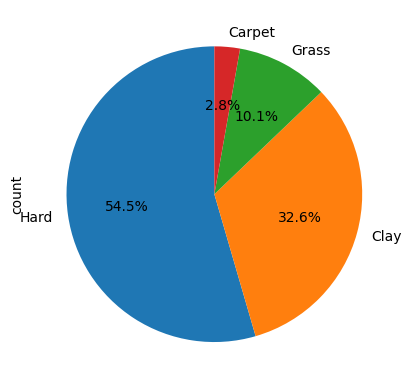

In [758]:
# Wizualizujemy rozklad roznych powierzchni
tenis_df = tenis_df.dropna(subset=['surface'])
surface = tenis_df['surface'].value_counts()
surface.plot(kind='pie', autopct='%1.1f%%', startangle=90)

In [759]:
# Zamieniamy statystyki meczowe na ich rolling avereges z ostatnich 10 meczow
def calculate_rolling_averages(df, columns_for_rolling_averages, player):
    df = df.copy()

    if not pd.api.types.is_datetime64_any_dtype(df['tourney_date']):
        df['tourney_date'] = pd.to_datetime(df['tourney_date'], format='%Y%m%d')

    df = df.sort_values(by=[f'{player}_id', 'tourney_date'])

    is_sorted = df.groupby(f'{player}_id')['tourney_date'].apply(lambda x: x.is_monotonic_increasing).all()
    print(f"Czy dane są posortowane według daty dla każdego zawodnika? {is_sorted}")

    for col in columns_for_rolling_averages:
        # Użyj okna przesuwnego o rozmiarze 10, min_periods=1 aby uwzględniać wszystkie dostępne mecze
        rolling_avg = (
            df.groupby(f'{player}_id')[col]
            .transform(lambda x: x.rolling(window=10, min_periods=1).mean().shift(1))
        )
        df[f'{player}_rolling_{col[2:]}'] = rolling_avg

    return df
columns_for_rolling_averages_winner = [
    'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced']

columns_for_rolling_averages_loser = [
    'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced'
]

tenis_df = calculate_rolling_averages(tenis_df, columns_for_rolling_averages_winner, 'winner')
tenis_df.drop(columns=columns_for_rolling_averages_winner, inplace=True)

tenis_df = calculate_rolling_averages(tenis_df, columns_for_rolling_averages_loser, 'loser')
tenis_df.drop(columns=columns_for_rolling_averages_loser, inplace=True)

first_row_after_rolling = tenis_df.iloc[0]
print(first_row_after_rolling, 'first_row_after_rolling')
tenis_df.to_csv('dane/rolling.csv', sep=';', index=False)

Czy dane są posortowane według daty dla każdego zawodnika? True
Czy dane są posortowane według daty dla każdego zawodnika? True
tourney_id                             2013-414
tourney_name                            Hamburg
surface                                    Clay
draw_size                                    48
tourney_level                                 A
tourney_date                2013-07-15 00:00:00
match_num                                     6
winner_id                                105138
winner_seed                                 NaN
winner_entry                                NaN
winner_name               Roberto Bautista Agut
winner_hand                                   R
winner_ht                                 183.0
winner_ioc                                  ESP
winner_age                                 25.2
loser_id                                 100644
loser_seed                                  NaN
loser_entry                                  WC
loser_na

In [760]:
print(tenis_df.shape[0], 'liczba rowow, powinno byc 73194')


73194 liczba rowow, powinno byc 73194


In [761]:
# Sprawdź, ile meczów miał zwycięzca z pierwszego wiersza
winner_id = tenis_df.loc[0, 'winner_id']
winner_matches = tenis_df[tenis_df['winner_id'] == winner_id]
print(f"Liczba meczów zwycięzcy (ID: {winner_id}): {len(winner_matches)}")

Liczba meczów zwycięzcy (ID: 103163): 455


In [762]:
print(tenis_df.shape[0], 'liczba rowow, powinno byc 73194')

73194 liczba rowow, powinno byc 73194


In [763]:
# Usuwamy kolumny ktore naszym zdaniem nie sa potrzebne
columns_to_drop = [
    'tourney_id', 'tourney_name', 'draw_size', 'match_num', 'winner_seed',
    'winner_name', 'loser_seed', 'winner_ioc', 'loser_name', 'loser_seed',
    'loser_ioc', 'score', 'tourney_date'
]

tenis_df = tenis_df.drop(columns=columns_to_drop)
tenis_df.head(5)

,surface,tourney_level,winner_id,winner_entry,winner_hand,winner_ht,winner_age,loser_id,loser_entry,loser_hand,...,winner_rolling_bpFaced,loser_rolling_ace,loser_rolling_df,loser_rolling_svpt,loser_rolling_1stIn,loser_rolling_1stWon,loser_rolling_2ndWon,loser_rolling_SvGms,loser_rolling_bpSaved,loser_rolling_bpFaced
43339,Clay,A,105138,NaN,R,183.0,25.2,100644,WC,R,...,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45575,Clay,A,103781,NaN,L,183.0,32.9,100644,WC,R,...,5.2,1.000000,7.000000,39.000000,14.000000,7.0,6.000000,8.00,2.00,8.000000
46222,Clay,A,104586,NaN,R,196.0,28.9,100644,WC,R,...,4.0,1.000000,4.000000,41.500000,17.000000,8.0,7.000000,7.50,2.00,7.500000
46313,Clay,A,103970,NaN,R,175.0,32.2,100644,WC,R,...,5.6,2.666667,5.333333,58.666667,29.333333,17.0,12.666667,9.00,2.00,6.333333
46370,Clay,A,103656,NaN,R,175.0,33.6,100644,NaN,R,...,4.0,2.750000,4.750000,54.000000,26.500000,15.0,11.000000,8.25,2.25,6.750000


In [764]:
print(tenis_df.columns)

Index(['surface', 'tourney_level', 'winner_id', 'winner_entry', 'winner_hand',
       'winner_ht', 'winner_age', 'loser_id', 'loser_entry', 'loser_hand',
       'loser_ht', 'loser_age', 'best_of', 'round', 'minutes', 'winner_rank',
       'winner_rank_points', 'loser_rank', 'loser_rank_points',
       'winner_rolling_ace', 'winner_rolling_df', 'winner_rolling_svpt',
       'winner_rolling_1stIn', 'winner_rolling_1stWon',
       'winner_rolling_2ndWon', 'winner_rolling_SvGms',
       'winner_rolling_bpSaved', 'winner_rolling_bpFaced', 'loser_rolling_ace',
       'loser_rolling_df', 'loser_rolling_svpt', 'loser_rolling_1stIn',
       'loser_rolling_1stWon', 'loser_rolling_2ndWon', 'loser_rolling_SvGms',
       'loser_rolling_bpSaved', 'loser_rolling_bpFaced'],
      dtype='object')


In [765]:
# Zmiana nazw kolumn winner -> player_1 i loser -> player_0
tenis_df.columns = tenis_df.columns.str.replace('winner', 'player1')
tenis_df.columns = tenis_df.columns.str.replace('loser', 'player0')

# Sprawdzenie zmian
print(tenis_df.columns)

# Dodaj kolumnę label (player_1 zawsze wygrywa)
tenis_df['label'] = 1
tenis_df.head(5)


Index(['surface', 'tourney_level', 'player1_id', 'player1_entry',
       'player1_hand', 'player1_ht', 'player1_age', 'player0_id',
       'player0_entry', 'player0_hand', 'player0_ht', 'player0_age', 'best_of',
       'round', 'minutes', 'player1_rank', 'player1_rank_points',
       'player0_rank', 'player0_rank_points', 'player1_rolling_ace',
       'player1_rolling_df', 'player1_rolling_svpt', 'player1_rolling_1stIn',
       'player1_rolling_1stWon', 'player1_rolling_2ndWon',
       'player1_rolling_SvGms', 'player1_rolling_bpSaved',
       'player1_rolling_bpFaced', 'player0_rolling_ace', 'player0_rolling_df',
       'player0_rolling_svpt', 'player0_rolling_1stIn',
       'player0_rolling_1stWon', 'player0_rolling_2ndWon',
       'player0_rolling_SvGms', 'player0_rolling_bpSaved',
       'player0_rolling_bpFaced'],
      dtype='object')


,surface,tourney_level,player1_id,player1_entry,player1_hand,player1_ht,player1_age,player0_id,player0_entry,player0_hand,...,player0_rolling_ace,player0_rolling_df,player0_rolling_svpt,player0_rolling_1stIn,player0_rolling_1stWon,player0_rolling_2ndWon,player0_rolling_SvGms,player0_rolling_bpSaved,player0_rolling_bpFaced,label
43339,Clay,A,105138,NaN,R,183.0,25.2,100644,WC,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
45575,Clay,A,103781,NaN,L,183.0,32.9,100644,WC,R,...,1.000000,7.000000,39.000000,14.000000,7.0,6.000000,8.00,2.00,8.000000,1
46222,Clay,A,104586,NaN,R,196.0,28.9,100644,WC,R,...,1.000000,4.000000,41.500000,17.000000,8.0,7.000000,7.50,2.00,7.500000,1
46313,Clay,A,103970,NaN,R,175.0,32.2,100644,WC,R,...,2.666667,5.333333,58.666667,29.333333,17.0,12.666667,9.00,2.00,6.333333,1
46370,Clay,A,103656,NaN,R,175.0,33.6,100644,NaN,R,...,2.750000,4.750000,54.000000,26.500000,15.0,11.000000,8.25,2.25,6.750000,1


In [766]:
print(tenis_df.shape[0], 'liczba rowow, powinno byc 73194')

73194 liczba rowow, powinno byc 73194


In [767]:
print(tenis_df.dtypes)

surface                     object
tourney_level               object
player1_id                   int64
player1_entry               object
player1_hand                object
player1_ht                 float64
player1_age                float64
player0_id                   int64
player0_entry               object
player0_hand                object
player0_ht                 float64
player0_age                float64
best_of                      int64
round                       object
minutes                    float64
player1_rank               float64
player1_rank_points        float64
player0_rank               float64
player0_rank_points        float64
player1_rolling_ace        float64
player1_rolling_df         float64
player1_rolling_svpt       float64
player1_rolling_1stIn      float64
player1_rolling_1stWon     float64
player1_rolling_2ndWon     float64
player1_rolling_SvGms      float64
player1_rolling_bpSaved    float64
player1_rolling_bpFaced    float64
player0_rolling_ace 

In [768]:
# One-hot encoding dla wybranych kolumn
columns_to_encode = ['surface', 'player0_entry', 'player0_hand', 'player1_entry', 'player1_hand']
tenis_df = pd.get_dummies(tenis_df, columns=columns_to_encode, drop_first=True)
tenis_df.head(5)


,tourney_level,player1_id,player1_ht,player1_age,player0_id,player0_ht,player0_age,best_of,round,minutes,...,player0_hand_U,player1_entry_Alt,player1_entry_LL,player1_entry_PR,player1_entry_Q,player1_entry_SE,player1_entry_WC,player1_hand_L,player1_hand_R,player1_hand_U
43339,A,105138,183.0,25.2,100644,198.0,16.2,3,R64,67.0,...,False,False,False,False,False,False,False,False,True,False
45575,A,103781,183.0,32.9,100644,198.0,17.0,3,R32,63.0,...,False,False,False,False,False,False,False,True,False,False
46222,A,104586,196.0,28.9,100644,198.0,17.2,3,R32,103.0,...,False,False,False,False,False,False,False,False,True,False
46313,A,103970,175.0,32.2,100644,198.0,17.2,3,SF,56.0,...,False,False,False,False,False,False,False,False,True,False
46370,A,103656,175.0,33.6,100644,198.0,17.2,3,R32,86.0,...,False,False,False,False,False,False,False,False,True,False


In [769]:
# Sprawdzamy jakie sa wartosci w kolumnie tourney_level
print(tenis_df['tourney_level'].unique())

['A' 'M' 'G' 'D' 'F']


In [770]:
# Label encoding dla kolumny tourney_level
tourney_level_mapping = {
    'G': 6,  # Grand Slams
    'M': 5,  # Masters 1000s
    'F': 4,  # Tour finals and season-ending events
    'D': 3,  # Davis Cup
    'A': 2,  # Other tour-level events
    'C': 1,  # Challengers
    'S': 0   # Satellites/ITFs
}
tenis_df['tourney_level'] = tenis_df['tourney_level'].map(tourney_level_mapping)

In [771]:
# Sprawdzamy jakie sa wartosci w kolumnie round
print(tenis_df['round'].unique())

['R64' 'R32' 'SF' 'R16' 'QF' 'R128' 'RR' 'F' 'ER' 'BR']


In [772]:
# Sprawdzamy kilka wierszy w ktorych kolumna round = er, zeby zrozumiec co ona oznacza
er_rows = tenis_df[tenis_df['round'] == 'ER']
er_rows.tail(5)
# Mecze sa z buenos aires, gdzie stosuje sie runde eliminacyjna

,tourney_level,player1_id,player1_ht,player1_age,player0_id,player0_ht,player0_age,best_of,round,minutes,...,player0_hand_U,player1_entry_Alt,player1_entry_LL,player1_entry_PR,player1_entry_Q,player1_entry_SE,player1_entry_WC,player1_hand_L,player1_hand_R,player1_hand_U
23593,2,105223,198.0,18.2,104424,178.0,22.3,3,ER,79.0,...,False,False,False,False,False,False,False,False,True,False
24553,2,103857,180.0,25.4,104433,185.0,22.4,3,ER,97.0,...,False,False,False,False,False,False,False,False,True,False
24552,2,103852,188.0,25.4,104589,201.0,21.5,3,ER,110.0,...,False,False,False,False,False,False,False,True,False,False
24841,2,102318,183.0,33.0,104592,193.0,21.4,3,ER,38.0,...,False,False,False,False,False,False,False,False,True,False
24839,2,104268,185.0,23.2,104660,193.0,21.0,3,ER,76.0,...,False,False,False,False,False,False,False,True,False,False


In [773]:
# Sprawdzamy kilka wierszy w ktorych kolumna round = rr, zeby zrozumiec co ona oznacza
rr_rows = tenis_df[tenis_df['round'] == 'RR']
rr_rows.tail(5)
# Mecze sa z davis cup, co oznacza faze grupowa (robin round)

,tourney_level,player1_id,player1_ht,player1_age,player0_id,player0_ht,player0_age,best_of,round,minutes,...,player0_hand_U,player1_entry_Alt,player1_entry_LL,player1_entry_PR,player1_entry_Q,player1_entry_SE,player1_entry_WC,player1_hand_L,player1_hand_R,player1_hand_U
73184,3,209354,NaN,22.7,212203,NaN,17.8,3,RR,83.0,...,True,False,False,False,False,False,False,False,False,True
73200,3,149282,NaN,17.4,212717,NaN,19.0,3,RR,61.0,...,True,False,False,False,False,False,False,False,False,True
73221,3,105656,191.0,33.2,212718,NaN,26.8,3,RR,46.0,...,True,False,False,False,False,False,False,False,True,False
73222,3,212720,NaN,18.3,212719,NaN,27.2,3,RR,78.0,...,True,False,False,False,False,False,False,False,False,True
73225,3,212721,NaN,18.6,212722,NaN,18.5,3,RR,119.0,...,True,False,False,False,False,False,False,False,False,True


In [774]:
# Sprawdzamy kilka wierszy w ktorych kolumna round = br, zeby zrozumiec co ona oznacza
br_rows = tenis_df[tenis_df['round'] == 'BR']
br_rows.tail(5)
# Wiele meczy jest z olimpiady, czyli oznacza to mecz o brazowy medal

,tourney_level,player1_id,player1_ht,player1_age,player0_id,player0_ht,player0_age,best_of,round,minutes,...,player0_hand_U,player1_entry_Alt,player1_entry_LL,player1_entry_PR,player1_entry_Q,player1_entry_SE,player1_entry_WC,player1_hand_L,player1_hand_R,player1_hand_U
52402,2,105453,178.0,26.6,104745,185.0,30.1,3,BR,169.0,...,False,False,False,False,False,False,False,False,True,False
40574,2,105223,198.0,23.8,104925,188.0,25.1,3,BR,NaN,...,False,False,False,False,False,False,False,False,True,False
63257,2,105807,188.0,30.0,104925,188.0,34.1,3,BR,NaN,...,False,False,False,False,False,False,False,False,True,False
56004,4,106421,198.0,21.7,106432,188.0,20.9,3,BR,NaN,...,False,False,False,False,False,False,False,False,True,False
58899,4,126094,188.0,21.0,144719,183.0,21.5,3,BR,107.0,...,False,False,False,False,False,False,False,False,True,False


In [775]:
# Label encoding dla kolumny round i tourney_level (br bronze round, rr faza grupowa, er elimination round)
round_mapping = {
    'ER': 1, 'RR': 2, 'R128': 3, 'R64': 4, 'R32': 5, 'R16': 6, 'QF': 7, 'SF': 8, 'BR': 9, 'F': 10
}
tenis_df['round'] = tenis_df['round'].map(round_mapping)

In [776]:
print(tenis_df.shape[0], 'liczba rowow, powinno byc 73194')

73194 liczba rowow, powinno byc 73194


In [777]:
# Wyprintuj wiersze oraz kolumny, w których są NaN
null_columns = tenis_df.columns[tenis_df.isnull().any()]
print(f"Kolumny z brakującymi wartościami: {list(null_columns)}")
print("Liczba wierszy z brakującymi wartościami: ", tenis_df.isnull().sum().sum())

Kolumny z brakującymi wartościami: ['player1_ht', 'player1_age', 'player0_ht', 'player0_age', 'minutes', 'player1_rank', 'player1_rank_points', 'player0_rank', 'player0_rank_points', 'player1_rolling_ace', 'player1_rolling_df', 'player1_rolling_svpt', 'player1_rolling_1stIn', 'player1_rolling_1stWon', 'player1_rolling_2ndWon', 'player1_rolling_SvGms', 'player1_rolling_bpSaved', 'player1_rolling_bpFaced', 'player0_rolling_ace', 'player0_rolling_df', 'player0_rolling_svpt', 'player0_rolling_1stIn', 'player0_rolling_1stWon', 'player0_rolling_2ndWon', 'player0_rolling_SvGms', 'player0_rolling_bpSaved', 'player0_rolling_bpFaced']
Liczba wierszy z brakującymi wartościami:  92431


In [778]:
# Funkcja do uzupełniania brakujących wartości w grupach, a następnie globalnie
def fillna_grouped_then_global(df, group_col, target_col, method='mean'):
    # Uzupełnij brakujące wartości średnią/medianą w ramach grup
    if method == 'mean':
        df[target_col] = df.groupby(group_col)[target_col].transform(lambda x: x.fillna(x.mean()))
    elif method == 'median':
        df[target_col] = df.groupby(group_col)[target_col].transform(lambda x: x.fillna(x.median()))

    # Uzupełnij pozostałe brakujące wartości globalną średnią/medianą
    if method == 'mean':
        df[target_col] = df[target_col].fillna(df[target_col].mean())
    elif method == 'median':
        df[target_col] = df[target_col].fillna(df[target_col].median())

    return df

# Uzupełnienie wzrostu i wieku średnią/medianą w ramach grup, a następnie globalnie
tenis_df = fillna_grouped_then_global(tenis_df, 'player1_age', 'player1_ht', method='mean')
tenis_df = fillna_grouped_then_global(tenis_df, 'player0_age', 'player0_ht', method='mean')
tenis_df['player1_age'] = tenis_df['player1_age'].fillna(tenis_df['player1_age'].median())
tenis_df['player0_age'] = tenis_df['player0_age'].fillna(tenis_df['player0_age'].median())

# Uzupełnienie czasu trwania meczu medianą
tenis_df['minutes'] = tenis_df['minutes'].fillna(tenis_df['minutes'].median())

# Uzupełnienie rankingu i punktów rankingowych
tenis_df['player1_rank'] = tenis_df['player1_rank'].fillna(2000)  # Poza rankingiem ATP
tenis_df['player0_rank'] = tenis_df['player0_rank'].fillna(2000)  # Poza rankingiem ATP
tenis_df['player1_rank_points'] = tenis_df['player1_rank_points'].fillna(0)  # Brak punktów
tenis_df['player0_rank_points'] = tenis_df['player0_rank_points'].fillna(0)  # Brak punktów

# Dodanie flag dla brakujących wartości
tenis_df['player1_ht_missing'] = tenis_df['player1_ht'].isnull().astype(int)
tenis_df['player0_ht_missing'] = tenis_df['player0_ht'].isnull().astype(int)

player1_rolling_features = [player1_col for player1_col in tenis_df.columns if player1_col.startswith('player1_rolling_')]
player0_rolling_features = [player0_col for player0_col in tenis_df.columns if player0_col.startswith('player0_rolling_')]
rolling_features = player1_rolling_features + player0_rolling_features

# Uzupełnienie statystyk rollingowych wartością domyślną (0)
for col in rolling_features:
    tenis_df[col] = tenis_df[col].fillna(0)

# Sprawdzenie, czy wszystkie brakujące wartości zostały wyeliminowane
print("Czy nadal istnieją brakujące wartości w danych?", tenis_df.isnull().sum().sum() > 0)

# Kolumny, które nadal mają nulle
null_columns = tenis_df.columns[tenis_df.isnull().any()]
print(f"Kolumny z brakującymi wartościami: {list(null_columns)}")

Czy nadal istnieją brakujące wartości w danych? False
Kolumny z brakującymi wartościami: []


In [779]:
# Sprawdzamy ile mamy wierszy, powinno byc 73194
print(tenis_df.shape[0])
# Sprawdzamy ile razy id (103819) Federera wystepuje jako wygrany, powinno byc 1250
print(tenis_df[tenis_df['player1_id'] == 103819].shape[0])

73194
1250


In [780]:
# Nie mozemy w kolumnie Y miec tylko jednej wartosci, dlatego dla polowy przypadkow zamieniamy zawodnika1 z zawodnikiem 2 i label z 1 na 0
def swap_players_every_other_row(df):
    # Dodaj kolumnę player1_entry_S, jeśli jej nie ma
    if 'player1_entry_S' not in df.columns:
        df['player1_entry_S'] = 0

    # Filtruj kolumny dla player1 i player0
    player1_cols = [column for column in df.columns if column.startswith('player1')]
    player0_cols = [column for column in df.columns if column.startswith('player0')]

    # Upewnij się, że kolumny player1 i player0 mają taką samą strukturę
    assert len(player1_cols) == len(player0_cols), "Kolumny player1 i player0 muszą być zgodne."

    # Wybierz co drugi wiersz (indeksy parzyste)
    swap_indices = df.index[::2]

    # Zamień dane player1 <-> player0 w wybranych wierszach
    # Upewnij się, że typy danych są zgodne
    for col1, col0 in zip(player1_cols, player0_cols):
        df[col1] = df[col1].astype(df[col0].dtype)
        df[col0] = df[col0].astype(df[col1].dtype)

    df.loc[swap_indices, player1_cols + player0_cols] = df.loc[swap_indices, player0_cols + player1_cols].values

    # Ustaw etykietę (label) na 0 w podmienionych wierszach
    if 'label' in df.columns:
        df.loc[swap_indices, 'label'] = 0

    return df

swapped_players_df = swap_players_every_other_row(tenis_df)
print(swapped_players_df.shape[0], 'liczba rowow, powinno byc 73194')
swapped_players_df.head(5)

73194 liczba rowow, powinno byc 73194


,tourney_level,player1_id,player1_ht,player1_age,player0_id,player0_ht,player0_age,best_of,round,minutes,...,player1_entry_PR,player1_entry_Q,player1_entry_SE,player1_entry_WC,player1_hand_L,player1_hand_R,player1_hand_U,player1_ht_missing,player0_ht_missing,player1_entry_S
43339,2,100644,198.0,16.2,105138,183.0,25.2,3,4,67.0,...,False,False,False,False,True,False,True,False,0,0
45575,2,103781,183.0,32.9,100644,198.0,17.0,3,5,63.0,...,False,False,False,False,True,False,False,False,0,0
46222,2,100644,198.0,17.2,104586,196.0,28.9,3,5,103.0,...,False,False,False,False,True,False,True,False,0,0
46313,2,103970,175.0,32.2,100644,198.0,17.2,3,8,56.0,...,False,False,False,False,False,True,False,False,0,0
46370,2,100644,198.0,17.2,103656,175.0,33.6,3,5,86.0,...,False,False,False,False,False,False,True,False,0,0


In [781]:
# Liczymy ile wystapilo upsetow, czyli sytuacji w ktorych zawodnik z gorszym rankingiem wygral

# Ustawienie progu różnicy rankingowej, czyli sytuacji, w której różnica rankingów jest na tyle duża, że można mówić o upsetach
ranking_threshold = 10

# Sprawdź, czy wystąpił upset z uwzględnieniem progu różnicy rankingowej
tenis_df['is_upset'] = (
    ((tenis_df['label'] == 1) & (tenis_df['player1_rank'] - tenis_df['player0_rank'] > ranking_threshold)) |  # Player1 wygrał, ale miał znacznie gorszy ranking
    ((tenis_df['label'] == 0) & (tenis_df['player0_rank'] - tenis_df['player1_rank'] > ranking_threshold))    # Player0 wygrał, ale miał znacznie gorszy ranking
)

# Oblicz liczbę upsetów
num_upsets = tenis_df['is_upset'].sum()

# Oblicz procent upsetów
percent_upsets = (num_upsets / len(tenis_df)) * 100

print(f"Procent upsetów (z progiem różnicy rankingowej {ranking_threshold}): {percent_upsets:.2f}%")

Procent upsetów (z progiem różnicy rankingowej 10): 27.89%


In [782]:
# Liczymy ile wystapilo upsetow, czyli sytuacji w ktorych zawodnik z gorszym rankingiem wygral

# Ustawienie progu różnicy rankingowej, czyli sytuacji, w której różnica rankingów jest na tyle duża, że można mówić o upsetach
ranking_threshold = 100

# Sprawdź, czy wystąpił upset z uwzględnieniem progu różnicy rankingowej
tenis_df['is_upset'] = (
    ((tenis_df['label'] == 1) & (tenis_df['player1_rank'] - tenis_df['player0_rank'] > ranking_threshold)) |  # Player1 wygrał, ale miał znacznie gorszy ranking
    ((tenis_df['label'] == 0) & (tenis_df['player0_rank'] - tenis_df['player1_rank'] > ranking_threshold))    # Player0 wygrał, ale miał znacznie gorszy ranking
)

# Oblicz liczbę upsetów
num_upsets = tenis_df['is_upset'].sum()

# Oblicz procent upsetów
percent_upsets = (num_upsets / len(tenis_df)) * 100

print(f"Procent upsetów (z progiem różnicy rankingowej {ranking_threshold}): {percent_upsets:.2f}%")

Procent upsetów (z progiem różnicy rankingowej 100): 5.41%


In [783]:
# Usuwamy kolumne is_upset
tenis_df = tenis_df.drop(columns=['is_upset'])

In [784]:
print(tenis_df.shape[0], 'liczba rowow, powinno byc 73194')

73194 liczba rowow, powinno byc 73194


In [785]:
swapped_players_df.to_csv('dane/gotowe_dane.csv', sep=';', index=False)